In [1]:
! pip install --upgrade --quiet pip
! pip install tensorboard==2.17

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1


In [2]:
! pip uninstall transformers -y
! pip install transformers==4.45.2

Found existing installation: transformers 4.47.1
Uninstalling transformers-4.47.1:
  Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0


In [3]:
# ! pip install --upgrade --quiet accelerate evaluate jiwer

In [4]:
! pip install datasets silero_vad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 168.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pip install evaluate

# Imports

In [7]:
from transformers import WhisperFeatureExtractor
from transformers import WhisperProcessor
import pandas as pd
import requests
import os
import ast
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio
import math
import soundfile as sf
from datasets import Dataset
from transformers import WhisperProcessor
from transformers import WhisperTokenizer
from sklearn.model_selection import train_test_split
import datasets
from transformers import WhisperForConditionalGeneration
import torch
from datetime import datetime
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import evaluate
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
from tqdm import tqdm
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
import matplotlib.pyplot as plt
from silero_vad import load_silero_vad, read_audio, get_speech_timestamps


In [8]:
tqdm.pandas()

In [9]:
exp_id = str(datetime.now())

In [28]:
G_DRIVE_PATH = os.path.join('./drive/MyDrive/Collab/FPL_ASR', exp_id)

In [10]:
# G_DRIVE_PATH = os.path.join('./drive/MyDrive/Collab/FPL_ASR', exp_id)

# if not os.path.isdir(G_DRIVE_PATH):
#   os.makedirs(G_DRIVE_PATH)

In [11]:
ROOT_FOLDER = os.path.join('./drive/MyDrive/Collab/FPL_ASR', '')

In [ ]:
# df = pd.read_csv('01oct24_to_19dec24_all_calls_with_transcripts.csv')
# df = pd.read_csv(os.path.join(ROOT_FOLDER, 'random100audio.csv'))
df = pd.read_csv(os.path.join(ROOT_FOLDER, 'data/Transcription_data_from_mihub.csv'))
df.shape

(956, 7)

In [ ]:
# df.loc[953,"transcription"]

In [ ]:
df.loc[953,:]

,953
Unnamed: 0,953
audio_id,fe68a422-c0c8-455f-a49e-9feba9beba8b
audio_name,20241220101220_9328797687.mp3
speaker,"['customer', 'agent', 'customer', 'customer', ..."
transcription,"['hello', 'hello shitala base well hello sir g..."
start_time,"[0.0, 0.156, 3.118, 6.478, 11.47, 12.814, 18.4..."
end_time,"[0.818, 10.994, 4.562, 7.922, 12.242, 18.098, ..."


In [ ]:
df.loc[953,"transcription"]

"['hello', 'hello shitala base well hello sir good morning am i speaking with mister dhulariya raj ranjan vein ke yahan baat ho rhi hain', 'han boliye madam', 'good morning bolo', 'yes madam', 'ji mein priyanka baat kar rhi hun sir account manager b o b one card credit card se', 'han boliye', 'aap ji recorded line pe apne jo card liya hain ye payment huaa nahi hain apka abhi tak', 'han', 'toh isko abhi kar denge payment char hazar tin sau ek ka apka partial amount hain', 'han', 'han chal diya madam payment toh mainne kar diya hain', 'kab kiya hain', 'chah saat din ho gaya', 'kaisa hoga', 'thik', 'nahi nahi apne jo payment kiya hain sir wo pichala payment apne kiya hum abhi baat kar rahe hain apka jo naya bill generate huaa hain uski baat kar rahe hain', 'hun', 'hello', 'hello', 'uska wo accha accha', 'han usme se jo partial amount hain apka', 'han', 'wo hain char hazar tin sau doh rupaye toh usko abhi kar denge', 'han koi baat nahi shaam tak toh ho jayega', 'toh shaam kab tak karenge',

In [ ]:
# df[df['audio_name'] == '20241208090513_9880986445.mp3' ]

In [ ]:
# def download_file(link, output_path = '.', file_name = None):
#     if not os.path.isdir(output_path):
#         os.makedirs(output_path)
#     if not file_name:
#         file_name = link.split('/')[-1]
#     try:
#         response = requests.get(link, stream=True)
#         response.raise_for_status()
#         with open(os.path.join(output_path, file_name), "wb") as file:
#             for chunk in response.iter_content(chunk_size=8192):
#                 file.write(chunk)
#         return True
#     except requests.exceptions.RequestException as e:
#         print(f'Couldnt download file {link}')
#         return False

# Explore one sample

In [ ]:
#sample = df.sample(1)
sample = df[df['Unnamed: 0'] == 953]
# link = sample['recording'].iloc[0]

In [ ]:
sample

,Unnamed: 0,audio_id,audio_name,speaker,transcription,start_time,end_time
953,953,fe68a422-c0c8-455f-a49e-9feba9beba8b,20241220101220_9328797687.mp3,"['customer', 'agent', 'customer', 'customer', ...","['hello', 'hello shitala base well hello sir g...","[0.0, 0.156, 3.118, 6.478, 11.47, 12.814, 18.4...","[0.818, 10.994, 4.562, 7.922, 12.242, 18.098, ..."


In [ ]:
start_times = [float(x) for x in ast.literal_eval(sample['start_time'].iloc[0])]
end_times = [float(x) for x in ast.literal_eval(sample['end_time'].iloc[0])]
transcripts = ast.literal_eval(sample['transcription'].iloc[0])
speakers = ast.literal_eval(sample['speaker'].iloc[0])

In [ ]:
# download_file(link, output_path = 'recordings')

In [ ]:
def separate_channels(audio_path, sr=None):
    audio, sr = librosa.load(audio_path, sr=sr, mono=False)
    left_channel, right_channel = audio[0], audio[1]
    return left_channel, right_channel, sr

In [ ]:
filename = 'https://fpl.intalk.io/recordings/ho.fpl.intalk.io/archive/2024/Dec/25/20241220101220_9328797687.mp3'.split('/')[-1]
# lc, rc, sr = separate_channels(f"./recordings/{filename}")
lc, rc, sr = separate_channels(os.path.join(ROOT_FOLDER,'data/Rec/',filename)) #lc is array of left channer audio amplitudes
# len(lc) = total_time_in_sec* sr(frequency)

In [ ]:
print(sr)

8000


In [ ]:
len(lc)

859200

In [ ]:
index = np.argmax(rc > 0.2)

In [ ]:
# lc[1000:1200]

In [ ]:
# rc[1000:1200]

## VAD Voice Activity Detector
LC = Agent

RC = Customer

In [ ]:
# Function to perform Voice Activity Detection (VAD)
def voice_activity_detection(audio, vad_model, sr):
    audio_input = torch.tensor(audio, dtype=torch.float32).unsqueeze(0)
    speech_timestamps = get_speech_timestamps(audio_input, vad_model, sampling_rate=sr)
    return speech_timestamps

vad_model = load_silero_vad()

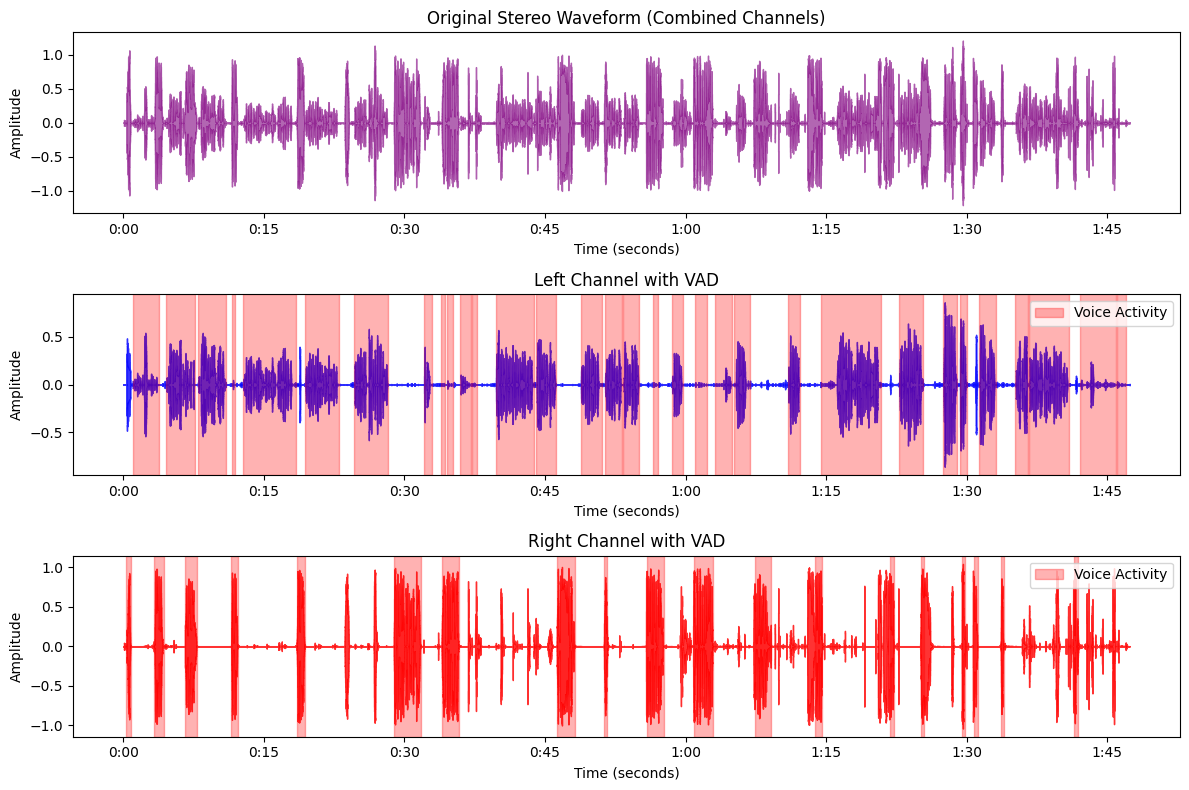

In [ ]:
left_speech_timestamps = voice_activity_detection(lc, vad_model, sr)
right_speech_timestamps = voice_activity_detection(rc, vad_model, sr)

# Create time axis for plotting # this is time axis 0 to number of seconds of call duration, sr is frequency. total sec = len(lc)/sr
time_axis = np.linspace(0, len(lc) / sr, len(lc))

# Plot the original combined stereo waveform
plt.figure(figsize=(12, 8))

# Combined stereo waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(lc + rc, sr=sr, alpha=0.6, color='purple')
plt.title("Original Stereo Waveform (Combined Channels)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Left channel with VAD Mask
plt.subplot(3, 1, 2)
librosa.display.waveshow(lc, sr=sr, alpha=0.8, color='blue')
# Overlay VAD mask on left channel (red shaded region)
for speech_segment in left_speech_timestamps:
    start_time = speech_segment['start'] / sr
    end_time = speech_segment['end'] / sr
    plt.axvspan(start_time, end_time, color='r', alpha=0.3, label="Voice Activity" if speech_segment == left_speech_timestamps[0] else "")
plt.title("Left Channel with VAD")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()

# Right channel with VAD Mask
plt.subplot(3, 1, 3)
librosa.display.waveshow(rc, sr=sr, alpha=0.8, color='red')
# Overlay VAD mask on right channel (red shaded region)
for speech_segment in right_speech_timestamps:
    start_time = speech_segment['start'] / sr
    end_time = speech_segment['end'] / sr
    plt.axvspan(start_time, end_time, color='r', alpha=0.3, label="Voice Activity" if speech_segment == right_speech_timestamps[0] else "")
plt.title("Right Channel with VAD")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()

# Layout adjustments and plot display
plt.tight_layout()
plt.show()

## Lables

In [ ]:
for record in left_speech_timestamps:
    print(record['start']/sr, record['end']/sr)

26.786 27.294
29.122 30.622
32.61 35.262
36.066 36.574
36.802 40.67
40.802 43.486
44.034 48.35
48.482 50.494
50.818 54.334
62.914 65.502
73.474 76.926
79.65 80.158
84.61 87.87
88.226 91.166
91.618 93.822
94.338 96.478
104.706 106.718
107.138 108.638
111.938 112.318
120.482 122.59
123.01 123.422
124.642 127.614
133.89 135.39
135.842 137.214
139.202 143.134
146.306 147.55
151.682 152.766
162.722 163.518
163.874 165.438
165.762 167.102
167.394 168.574
170.594 172.478
176.802 178.782
179.17 180.35
192.45 194.526
196.61 198.942
201.41 201.886
202.658 203.806
205.89 206.302
225.57 226.046
229.826 231.134
236.482 237.086
237.73 238.59
238.818 240.766
241.826 244.126
244.61 245.182
245.922 249.15
250.082 250.814
253.666 257.342
257.858 258.302
259.106 260.606
261.058 262.814
268.93 269.278
293.634 296.03
306.05 309.086
312.706 315.23
315.682 316.414
318.946 321.086
321.922 323.07
324.034 324.67
325.314 327.23
327.714 329.374
331.33 331.71
379.426 380.766
381.826 384.542
408.61 409.182
409.378 

In [ ]:
for i in range(len(start_times)):
    print(start_times[i], end_times[i], speakers[i], transcripts[i])

0.0 0.818 customer hello
0.156 10.994 agent hello shitala base well hello sir good morning am i speaking with mister dhulariya raj ranjan vein ke yahan baat ho rhi hain
3.118 4.562 customer han boliye madam
6.478 7.922 customer good morning bolo
11.47 12.242 customer yes madam
12.814 18.098 agent ji mein priyanka baat kar rhi hun sir account manager b o b one card credit card se
18.478 19.442 customer han boliye
18.67 22.898 agent aap ji recorded line pe apne jo card liya hain ye payment huaa nahi hain apka abhi tak
23.566 24.146 customer han
24.622 28.274 agent toh isko abhi kar denge payment char hazar tin sau ek ka apka partial amount hain
25.966 27.122 customer han
28.75 32.114 customer han chal diya madam payment toh mainne kar diya hain
32.014 32.786 agent kab kiya hain
33.454 35.858 customer chah saat din ho gaya
35.95 36.914 agent kaisa hoga
36.718 38.162 customer thik
39.694 46.226 agent nahi nahi apne jo payment kiya hain sir wo pichala payment apne kiya hum abhi baat kar rah

In [ ]:
Audio(lc[int(start_times[5]*sr):int(end_times[5]*sr)], rate=sr)

In [ ]:
del vad_model

In [ ]:
# ! rm -r audio_segments recordings

In [ ]:
os.path.join(ROOT_FOLDER,'recordings')

'./drive/MyDrive/Collab/FPL_ASR/recordings'

In [ ]:
folders2make = [ 'processed_data/audio_segments']
for path in folders2make:
    os.makedirs(os.path.join(ROOT_FOLDER,path), exist_ok=True)

In [ ]:
files = os.listdir(os.path.join(ROOT_FOLDER,'data/Rec'))

In [ ]:
(df['audio_name'].isin(files)).value_counts()

,count
audio_name,
True,956


In [ ]:
seconds2process = 3 * 3600
secondssofar = 0
processed_audio_file_paths, transcript_labels = [], []

def process_audio(row):
    seconds_processed = 0
    # link = row['recording']
    # if not download_file(link, output_path = 'recordings'):
    #     return seconds_processed

    # filename = link.split('/')[-1]
    filename = row['audio_name']

    start_times = [float(x) for x in ast.literal_eval(row['start_time'])]
    end_times = [float(x) for x in ast.literal_eval(row['end_time'])]
    transcripts = ast.literal_eval(row['transcription'])
    speakers = ast.literal_eval(row['speaker'])

    lc, rc, sr = separate_channels(os.path.join(ROOT_FOLDER,'data/Rec/',filename), sr=16000)
    for start, end, speaker, transcript in zip(start_times, end_times, speakers, transcripts):
        if end-start>=30:
            continue
        try:
            lower, upper = math.floor(start*sr), math.ceil(end*sr)
            if speaker.lower()=='agent':
                segment = lc[lower:upper]
            else:
                segment = rc[lower:upper]

            [fileid, ext] = filename.split('.')
            segment_name = f"{fileid}_{round(end-start)}_{start}_{end}.wav"
            segment_path = os.path.join(ROOT_FOLDER,'processed_data/audio_segments',segment_name)
            sf.write(segment_path, segment, sr)
            seconds_processed += end-start

            processed_audio_file_paths.append(segment_path)
            transcript_labels.append(transcript)
        except:
            pass
    return seconds_processed

In [ ]:
for index, row in tqdm(df.sample(frac=1, random_state=1233).iterrows()):
    print(secondssofar)
    secondssofar += process_audio(row)
    if secondssofar > seconds2process:
        break

0it [00:00, ?it/s]

0


1it [00:00,  1.41it/s]

25.334


2it [00:01,  1.00s/it]

88.34199999999998


3it [00:02,  1.19it/s]

117.00399999999999


4it [00:03,  1.31it/s]

138.628


5it [00:04,  1.28it/s]

171.084


6it [00:04,  1.34it/s]

196.192


7it [00:05,  1.20it/s]

218.508


8it [00:06,  1.06it/s]

362.53599999999994


9it [00:08,  1.07s/it]

440.412


10it [00:09,  1.09s/it]

532.18


11it [00:10,  1.09s/it]

557.386


12it [00:11,  1.00s/it]

603.746


13it [00:11,  1.13it/s]

632.3199999999999


14it [00:12,  1.05it/s]

713.896


15it [00:14,  1.18s/it]

845.5239999999999


16it [00:16,  1.41s/it]

1010.4279999999999


17it [00:17,  1.23s/it]

1033.5079999999998


18it [00:18,  1.03s/it]

1052.9919999999997


19it [00:18,  1.08it/s]

1065.5139999999997


20it [00:19,  1.21it/s]

1102.3739999999996


21it [00:20,  1.09it/s]

1194.9359999999997


22it [00:21,  1.10it/s]

1229.5739999999996


23it [00:23,  1.14s/it]

1392.8779999999997


24it [00:24,  1.12s/it]

1459.9879999999996


25it [00:24,  1.01s/it]

1503.6959999999997


26it [00:25,  1.09it/s]

1527.4639999999997


27it [00:26,  1.13it/s]

1563.6919999999998


28it [00:27,  1.18it/s]

1594.3639999999998


29it [00:27,  1.23it/s]

1617.1599999999999


30it [00:28,  1.36it/s]

1642.4479999999999


31it [00:28,  1.51it/s]

1653.916


32it [00:29,  1.41it/s]

1724.104


33it [00:31,  1.06s/it]

1824.742


34it [00:32,  1.08it/s]

1880.782


35it [00:34,  1.25s/it]

2096.306


36it [00:35,  1.16s/it]

2134.56


37it [00:35,  1.01s/it]

2155.156


38it [00:36,  1.15it/s]

2178.96


39it [00:37,  1.17it/s]

2204.348


40it [00:38,  1.14s/it]

2277.092


41it [00:40,  1.31s/it]

2421.7560000000003


42it [00:42,  1.34s/it]

2567.8520000000003


43it [00:43,  1.41s/it]

2830.9120000000003


44it [00:44,  1.23s/it]

2887.2160000000003


45it [00:45,  1.05s/it]

2903.1000000000004


46it [00:45,  1.02it/s]

2927.5280000000002


47it [00:47,  1.13s/it]

3043.7720000000004


48it [00:48,  1.11s/it]

3097.9480000000003


49it [00:49,  1.03s/it]

3122.0840000000003


50it [00:50,  1.02s/it]

3176.2120000000004


51it [00:50,  1.12it/s]

3203.4200000000005


52it [00:52,  1.05s/it]

3303.7480000000005


53it [00:53,  1.19s/it]

3383.6500000000005


54it [00:54,  1.07s/it]

3413.1100000000006


55it [00:55,  1.01it/s]

3432.1620000000007


56it [00:56,  1.16s/it]

3551.1240000000007


57it [00:57,  1.02s/it]

3574.6840000000007


58it [00:58,  1.01it/s]

3601.178000000001


59it [00:59,  1.03it/s]

3668.5340000000006


60it [01:00,  1.06it/s]

3695.0220000000004


61it [01:01,  1.11it/s]

3723.0260000000003


62it [01:03,  1.21s/it]

3883.2540000000004


63it [01:03,  1.01s/it]

3900.0800000000004


64it [01:04,  1.15it/s]

3918.9360000000006


65it [01:04,  1.19it/s]

3945.0080000000007


66it [01:05,  1.26it/s]

3991.6480000000006


67it [01:06,  1.34it/s]

4016.4220000000005


68it [01:07,  1.37it/s]

4030.5820000000003


69it [01:07,  1.37it/s]

4054.6220000000003


70it [01:09,  1.16s/it]

4239.006


71it [01:10,  1.05s/it]

4250.304


72it [01:11,  1.04it/s]

4276.456


73it [01:12,  1.14it/s]

4289.416


74it [01:12,  1.26it/s]

4304.912


75it [01:13,  1.15it/s]

4345.898


76it [01:15,  1.03s/it]

4478.486


77it [01:15,  1.10it/s]

4502.156


78it [01:16,  1.09it/s]

4546.94


79it [01:17,  1.08it/s]

4573.0199999999995


80it [01:18,  1.08it/s]

4642.907999999999


81it [01:19,  1.08it/s]

4658.472


82it [01:20,  1.10it/s]

4675.732


83it [01:21,  1.18it/s]

4713.46


84it [01:23,  1.22s/it]

4906.884


85it [01:24,  1.17s/it]

4945.356


86it [01:26,  1.39s/it]

5128.411999999999


87it [01:26,  1.19s/it]

5179.231999999999


88it [01:28,  1.38s/it]

5364.995999999999


89it [01:30,  1.61s/it]

5609.799999999999


90it [01:32,  1.53s/it]

5756.7919999999995


91it [01:33,  1.46s/it]

5863.056


92it [01:34,  1.47s/it]

6016.508


93it [01:35,  1.21s/it]

6033.112


94it [01:37,  1.45s/it]

6251.152


95it [01:39,  1.66s/it]

6381.744


96it [01:40,  1.42s/it]

6400.526


97it [01:41,  1.24s/it]

6437.518


98it [01:42,  1.13s/it]

6507.874


99it [01:43,  1.09s/it]

6579.57


100it [01:43,  1.06it/s]

6605.63


101it [01:44,  1.20it/s]

6636.486


102it [01:45,  1.28it/s]

6659.58


103it [01:46,  1.11it/s]

6765.906


104it [01:46,  1.25it/s]

6782.458


105it [01:47,  1.34it/s]

6796.897999999999


106it [01:49,  1.21s/it]

7097.297999999999


107it [01:50,  1.05s/it]

7123.097999999999


108it [01:51,  1.01it/s]

7143.945999999999


109it [01:51,  1.15it/s]

7152.731999999999


110it [01:52,  1.16it/s]

7178.283999999999


111it [01:54,  1.17s/it]

7290.7559999999985


112it [01:56,  1.32s/it]

7506.845999999999


113it [01:57,  1.21s/it]

7615.513999999998


114it [01:57,  1.04s/it]

7639.6219999999985


115it [02:01,  1.78s/it]

8087.8499999999985


116it [02:02,  1.49s/it]

8112.733999999999


117it [02:02,  1.24s/it]

8134.6219999999985


118it [02:03,  1.12s/it]

8176.1219999999985


119it [02:04,  1.01it/s]

8200.514


120it [02:05,  1.04s/it]

8263.812


121it [02:06,  1.04it/s]

8292.064


122it [02:07,  1.14it/s]

8304.7


123it [02:07,  1.15it/s]

8348.872000000001


124it [02:11,  1.79s/it]

8808.99


125it [02:12,  1.52s/it]

8832.526


126it [02:14,  1.48s/it]

8946.369999999999


127it [02:17,  2.01s/it]

9381.122


128it [02:18,  1.66s/it]

9434.019999999999


129it [02:18,  1.37s/it]

9471.221999999998


130it [02:19,  1.18s/it]

9488.407999999998


131it [02:20,  1.14s/it]

9533.303999999998


132it [02:21,  1.10s/it]

9576.531999999997


133it [02:22,  1.03it/s]

9603.931999999997


134it [02:23,  1.13it/s]

9637.863999999998


135it [02:24,  1.09it/s]

9681.875999999998


136it [02:24,  1.17it/s]

9703.205999999998


137it [02:25,  1.28it/s]

9708.367999999999


138it [02:26,  1.24it/s]

9721.467999999999


139it [02:26,  1.29it/s]

9747.331999999999


140it [02:27,  1.47it/s]

9748.684


141it [02:27,  1.50it/s]

9776.276


142it [02:28,  1.48it/s]

9800.98


143it [02:29,  1.51it/s]

9825.48


144it [02:32,  1.39s/it]

10067.215999999999


145it [02:32,  1.12s/it]

10069.613999999998


146it [02:33,  1.08s/it]

10087.717999999997


147it [02:34,  1.03it/s]

10120.981999999996


148it [02:35,  1.00it/s]

10219.885999999997


149it [02:36,  1.08it/s]

10246.543999999996


150it [02:37,  1.10it/s]

10271.307999999995


151it [02:37,  1.24it/s]

10296.499999999995


152it [02:38,  1.35it/s]

10319.595999999994


153it [02:42,  1.61s/it]

10599.737999999994


153it [02:43,  1.07s/it]


In [ ]:
# ! rm -r recordings

In [ ]:
test_index = 110
test_audio, sr = librosa.load(processed_audio_file_paths[test_index], sr=16000, mono=True)
test_label = transcript_labels[test_index]

In [ ]:
Audio(test_audio, rate=16000)

In [ ]:
test_label

'han sorry maam humein allowed nahi hain okay'

In [ ]:
ground_truth = pd.DataFrame(zip(processed_audio_file_paths, transcript_labels), columns=['audio_path', 'text'])

In [ ]:
ground_truth.to_csv(os.path.join(ROOT_FOLDER,'processed_data/data.csv'))

In [13]:
ground_truth = pd.read_csv(os.path.join(ROOT_FOLDER,'processed_data/data.csv'), )

In [14]:
ground_truth.head()

,Unnamed: 0,audio_path,text
0,0,./drive/MyDrive/Collab/FPL_ASR/processed_data/...,over did two words near the person you are try...
1,1,./drive/MyDrive/Collab/FPL_ASR/processed_data/...,report
2,2,./drive/MyDrive/Collab/FPL_ASR/processed_data/...,good evening this is rohit calling you from on...
3,3,./drive/MyDrive/Collab/FPL_ASR/processed_data/...,hello am i speaking with bhadresh makvana sir
4,4,./drive/MyDrive/Collab/FPL_ASR/processed_data/...,hello


In [18]:
train_indices, test_indices = train_test_split(
    list(range(len(ground_truth))),
    test_size=0.2,
    random_state=42
)

# Select subsets
train_truth = ground_truth.iloc[train_indices]
test_truth = ground_truth.iloc[test_indices]

In [ ]:
len(train_truth), len(test_truth)

(2312, 578)

In [ ]:
del df, processed_audio_file_paths, transcript_labels, ground_truth

NameError: name 'processed_audio_file_paths' is not defined

# Load Model Checkpoints

In [12]:
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="English", task="transcribe")
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="English", task="transcribe")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# vanilla_pipe = pipeline(
#     "automatic-speech-recognition",
#     model=model,
#     tokenizer=processor.tokenizer,
#     feature_extractor=processor.feature_extractor,
#     max_new_tokens=128,
#     chunk_length_s=30,
#     batch_size=8,
#     torch_dtype=torch.float32,
#     device='cuda'
# )

In [ ]:
# y_test_true = test_truth['text'].tolist()

In [ ]:
# Y_test_pred = []
# for audio_path in tqdm(test_truth['audio_path'].tolist()):
#     Y_test_pred.append(vanilla_pipe(audio_path)['text'])

In [ ]:
# index=77

In [ ]:
# y_test_true[index]

In [ ]:
# Y_test_pred[index]

In [ ]:
# Audio(librosa.load(test_truth.iloc[index]['audio_path'], sr=16000)[0], rate=16000)

# Prepare dataset

In [19]:
# Assuming df is your DataFrame
train_dataset = Dataset.from_pandas(train_truth)
test_dataset = Dataset.from_pandas(test_truth)

In [20]:
train_dataset

Dataset({
    features: ['Unnamed: 0', 'audio_path', 'text', '__index_level_0__'],
    num_rows: 2312
})

In [21]:
train_dataset = train_dataset.cast_column("audio_path", datasets.Audio(sampling_rate=16000))
test_dataset = test_dataset.cast_column("audio_path", datasets.Audio(sampling_rate=16000))

In [22]:
train_dataset[0]

{'Unnamed: 0': 2219,
 'audio_path': {'path': './drive/MyDrive/Collab/FPL_ASR/processed_data/audio_segments/20241221165453_9067225692_2_30.286_32.594.wav',
  'array': array([ 2.44140625e-04,  2.44140625e-04,  2.44140625e-04, ...,
         -4.27246094e-04, -3.66210938e-04, -9.15527344e-05]),
  'sampling_rate': 16000},
 'text': 'kal hoga madam kal sunday ko hoga',
 '__index_level_0__': 2219}

In [23]:
MAX_DURATION_IN_SECONDS = 30.0
max_input_length = MAX_DURATION_IN_SECONDS * 16000
max_label_length = model.config.max_length

"""Filter inputs with zero input length or longer than 30s"""
def filter_inputs(input_length):
    return 0 < input_length < max_input_length

"""Filter label sequences longer than max length (448)"""
def filter_labels(labels_length):
    return labels_length < max_label_length

def prepare_dataset(batch):
    # resample audio data from 48 to 16kHz
    audio = batch["audio_path"]
    batch["input_length"] = len(batch["audio_path"])
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]
    batch["labels"] = tokenizer(batch["text"]).input_ids
    batch["labels_length"] = len(batch["text"])
    return batch

In [24]:
#Note train_dataset[0]['labels_length'] is the length of all the characters and hence it is not qual to tokenized length i.e. batch["labels_length"] = len(batch["text"])

In [25]:
train_dataset[0]

{'Unnamed: 0': 2219,
 'audio_path': {'path': './drive/MyDrive/Collab/FPL_ASR/processed_data/audio_segments/20241221165453_9067225692_2_30.286_32.594.wav',
  'array': array([ 2.44140625e-04,  2.44140625e-04,  2.44140625e-04, ...,
         -4.27246094e-04, -3.66210938e-04, -9.15527344e-05]),
  'sampling_rate': 16000},
 'text': 'kal hoga madam kal sunday ko hoga',
 '__index_level_0__': 2219}

In [26]:
train_dataset

Dataset({
    features: ['Unnamed: 0', 'audio_path', 'text', '__index_level_0__'],
    num_rows: 2312
})

In [27]:
train_dataset = train_dataset.map(prepare_dataset, remove_columns=["audio_path", "text"])
test_dataset = test_dataset.map(prepare_dataset, remove_columns=["audio_path", "text"])

Map:   0%|          | 0/2312 [00:00<?, ? examples/s]

Map:   0%|          | 0/578 [00:00<?, ? examples/s]

In [29]:
train_dataset[0]['labels']

[50258,
 50259,
 50359,
 50363,
 19990,
 276,
 9833,
 28882,
 7788,
 33047,
 320,
 8384,
 276,
 9833,
 50257]

In [30]:

len(train_dataset[0]['labels'])
train_dataset[0]['labels_length']

33

In [31]:
train_dataset = train_dataset.filter(filter_inputs, input_columns=["input_length"])
test_dataset = test_dataset.filter(filter_inputs, input_columns=["input_length"])

train_dataset = train_dataset.filter(filter_labels, input_columns=["labels_length"])
test_dataset = test_dataset.filter(filter_labels, input_columns=["labels_length"])

Filter:   0%|          | 0/2312 [00:00<?, ? examples/s]

Filter:   0%|          | 0/578 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2312 [00:00<?, ? examples/s]

Filter:   0%|          | 0/578 [00:00<?, ? examples/s]

In [32]:
len(train_dataset), len(test_dataset)

(2305, 576)

In [33]:
train_dataset[0]['labels']

[50258,
 50259,
 50359,
 50363,
 19990,
 276,
 9833,
 28882,
 7788,
 33047,
 320,
 8384,
 276,
 9833,
 50257]

In [36]:
train_dataset.save_to_disk(os.path.join(ROOT_FOLDER,'processed_data/Train_test/train_dataset'))
test_dataset.save_to_disk(os.path.join(ROOT_FOLDER,'processed_data/Train_test/test_dataset'))

Saving the dataset (0/5 shards):   0%|          | 0/2305 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/576 [00:00<?, ? examples/s]

# Training

In [37]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [38]:
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []
model.generation_config.language = "en"

In [40]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.6 MB/s eta 0:00:00


In [41]:
metric = evaluate.load("wer")
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids
    label_ids[label_ids == -100] = tokenizer.pad_token_id
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    wer = 100 * metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}

In [42]:
training_args = Seq2SeqTrainingArguments(
    output_dir=G_DRIVE_PATH,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=100,
    max_steps=500,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=100,
    eval_steps=100,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=False,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [43]:
trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Define your compute_metrics function (WER in this case)
    tokenizer=processor,
)

max_steps is given, it will override any value given in num_train_epochs


In [44]:
processor.save_pretrained(training_args.output_dir)

[]

In [46]:
training_args.output_dir

'./drive/MyDrive/Collab/FPL_ASR/2025-01-27 17:00:04.004705'

In [47]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
100,1.141200,1.063176,34.434811
200,0.340700,0.555234,24.766890


You have passed language=en, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=en.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
100,1.141200,1.063176,34.434811
200,0.340700,0.555234,24.766890
300,0.135900,0.558814,24.848683
400,0.039700,0.577908,24.292491
500,0.024000,0.586159,23.883527


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


TrainOutput(global_step=500, training_loss=0.6745339554548263, metrics={'train_runtime': 5758.5303, 'train_samples_per_second': 2.778, 'train_steps_per_second': 0.087, 'total_flos': 4.5913937190912e+18, 'train_loss': 0.6745339554548263, 'epoch': 6.896551724137931})

In [48]:
best_model_path = './drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500'

In [ ]:
model = AutoModelForSpeechSeq2Seq.from_pretrained(
    best_model_path, torch_dtype=torch.float32, low_cpu_mem_usage=True, use_safetensors=True
)
processor = AutoProcessor.from_pretrained(best_model_path)
pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=8,
    torch_dtype=torch.float32,
    device='cuda'
)


In [ ]:
sample = test_truth.sample(1)
print(sample['audio_path'].iloc[0])
print(sample['text'].iloc[0])

audio_segments/20241211105516_7021528727_6_11.95_18.098.wav
ji mein kamal baat kar raha hun se credit card ki taraf se recorded line pe pranaali ji se baat karna hain mujhe


In [ ]:
filepath = sample['audio_path'].iloc[0]

In [ ]:
audio, sr = librosa.load(os.path.join(ROOT_FOLDER, filepath), sr=sr, mono=True)

In [ ]:
result = pipe(audio)

In [ ]:
Audio(audio, rate=sr)

In [ ]:
result['text']

'ji mein kamal baat kar raha hun isb credit card ki taraf se recorded line pe raha ji bhaat karna hain mujhe'

In [ ]:
# ! zip -r best_checkpoint.zip ./drive/MyDrive/asr\ models/2024-12-26\ 09:42:38.786186/checkpoint-500


  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/ (stored 0%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/config.json (deflated 59%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/generation_config.json (deflated 73%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/model.safetensors
 (deflated 8%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/preprocessor_config.json (deflated 42%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/tokenizer_config.json (deflated 96%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/special_tokens_map.json (deflated 80%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/added_tokens.json (deflated 80%)
  adding: drive/MyDrive/asr models/2024-12-26 09:42:38.786186/checkpoint-500/vocab.json (deflated 69%)
  adding: drive/MyDri

In [ ]:
file_paths, true_labels, prediction_labels = [], [], []

for i, row in tqdm(test_truth.iterrows()):
    file_path = row['audio_path']
    true_label = row['text']
    prediction_label = pipe(file_path)['text']
    file_paths.append(file_path)
    true_labels.append(true_label)
    prediction_labels.append(prediction_label)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
1it [00:02,  2.95s/it]/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
2it [00:03,  1.42s/it]/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
3it [00:03,  1.08s/it]/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
4it [00:04,  1.13it/s]/usr/local/lib/python3.10/dist

In [ ]:
prediction_df = pd.DataFrame(
    list(zip(file_paths, true_labels, prediction_labels)),
    columns=['audio_path', 'true', 'predicted']
)

In [ ]:
prediction_df.to_csv('checkpoint predictions.csv', index=False)

In [ ]:
prediction_df.head()

,audio_path,true,predicted
0,audio_segments/20241208103037_9530183157_14_64...,chalega chalega sir mein update kar deta hun k...,chalega chalega kyon mein update kar doonga aa...
1,audio_segments/20241201154625_7289834833_1_75....,accha,accha
2,audio_segments/20241211122000_9903943413_4_394...,okay thank you apka kimati samay dene sir dhan...,okay thank you apka jinhati raajhi mein phle b...
3,audio_segments/20241210153930_8320666933_2_8.4...,worker manish ji se baat ho rhi hain sir,vatgat manish ji se baat ho rhi hain sir
4,audio_segments/20241130165029_7718976169_2_105...,kya kar,hain


In [ ]:
test_truth.head()

,audio_path,text
1575,audio_segments/20241208103037_9530183157_14_64...,chalega chalega sir mein update kar deta hun k...
324,audio_segments/20241201154625_7289834833_1_75....,accha
1491,audio_segments/20241211122000_9903943413_4_394...,okay thank you apka kimati samay dene sir dhan...
1815,audio_segments/20241210153930_8320666933_2_8.4...,worker manish ji se baat ho rhi hain sir
2174,audio_segments/20241130165029_7718976169_2_105...,kya kar


In [ ]:
prediction_df = pd.read_csv('checkpoint predictions.csv')

In [ ]:
prediction_df.shape

(570, 3)

In [ ]:
prediction_df.head()

,audio_path,true,predicted
0,audio_segments/20241208103037_9530183157_14_64...,chalega chalega sir mein update kar deta hun k...,chalega chalega kyon mein update kar doonga aa...
1,audio_segments/20241201154625_7289834833_1_75....,accha,accha
2,audio_segments/20241211122000_9903943413_4_394...,okay thank you apka kimati samay dene sir dhan...,okay thank you apka jinhati raajhi mein phle b...
3,audio_segments/20241210153930_8320666933_2_8.4...,worker manish ji se baat ho rhi hain sir,vatgat manish ji se baat ho rhi hain sir
4,audio_segments/20241130165029_7718976169_2_105...,kya kar,hain


In [ ]:
sample = prediction_df.sample(1)
print(sample['audio_path'].iloc[0])

audio_segments/20241209100838_9735861140_4_18.766_23.186.wav


In [ ]:
filepath = sample['audio_path'].iloc[0]
audio, sr = librosa.load(os.path.join(ROOT_FOLDER, filepath), sr=sr, mono=True)
Audio(audio, rate=sr)

In [ ]:
print(sample['true'].iloc[0])

han sir ye one card ke payment related call kiya tha apko wo payment apka receive nahi huaa hain sir abhi tak


In [ ]:
print(sample['predicted'].iloc[0])

han sir ye one card ke payment related call kiya tha apko wo payment apka receive nahi hain vah hain sir abhi tak
